In [1]:
# connecting to my google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [24]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/topic_probabilities.xlsx")

print(df.columns)

Index(['speechID', 'memberID', 'partyID', 'constID', 'title', 'date',
       'member_name', 'party_name', 'const_name', 'speech', 'speechnumber',
       'paragraphnumber', 'sentencenumber', 'parliament', 'iso3country',
       'speaker_uri', 'eu', 'policyarea', 'cmp_party', 'year', 'word_count',
       'combined_text', 'ni_score', 'five_year_period', 'ni_similarity',
       'cleaned_speech', 'embeddings', 'topic_0_prob', 'topic_1_prob',
       'topic_2_prob', 'topic_3_prob', 'topic_4_prob', 'topic_5_prob',
       'topic_6_prob', 'topic_7_prob', 'topic_8_prob', 'topic_9_prob',
       'topic_10_prob', 'topic_11_prob', 'topic_12_prob', 'topic_13_prob',
       'topic_14_prob', 'topic_15_prob', 'topic_16_prob', 'topic_17_prob',
       'topic_18_prob', 'topic_19_prob', 'topic_20_prob', 'topic_21_prob',
       'topic_22_prob', 'topic_23_prob', 'topic_24_prob', 'topic_25_prob',
       'topic_26_prob', 'topic_27_prob', 'main_topic'],
      dtype='object')


step 1: vis of all topics over time , notice the different y axis !

<ipython-input-32-c0b61931d630>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


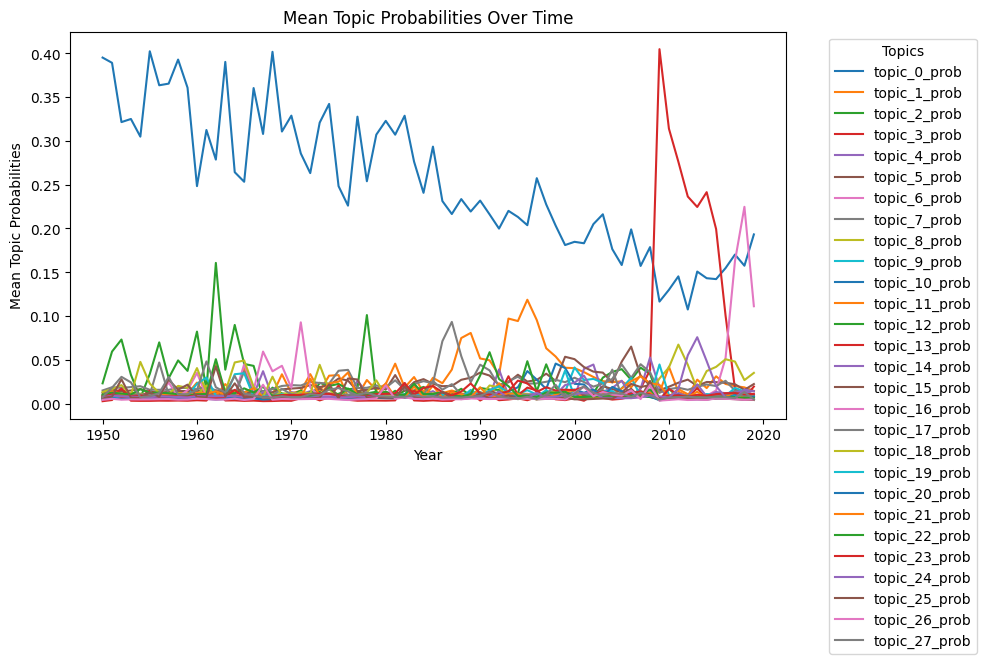

In [ ]:
# defining the topic cols
topic_columns = ['topic_0_prob', 'topic_1_prob', 'topic_2_prob', 'topic_3_prob',
       'topic_4_prob', 'topic_5_prob', 'topic_6_prob', 'topic_7_prob',
       'topic_8_prob', 'topic_9_prob', 'topic_10_prob', 'topic_11_prob',
       'topic_12_prob', 'topic_13_prob', 'topic_14_prob', 'topic_15_prob',
       'topic_16_prob', 'topic_17_prob', 'topic_18_prob', 'topic_19_prob',
        "topic_20_prob", "topic_21_prob","topic_22_prob","topic_23_prob",
        "topic_24_prob","topic_25_prob", "topic_26_prob","topic_27_prob"]

# have to change the year col to correct format
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year

df = df.dropna(subset=['year'])  # remove rows with no year
df['year'] = df['year'].astype(int)


import matplotlib.pyplot as plt

# Group by 'year' and plot the mean topic probabilities
df.groupby('year')[topic_columns].mean().plot(kind='line', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Mean Topic Probabilities')
plt.title('Mean Topic Probabilities Over Time')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

step 2 to normalise the data to get around this issue

In [25]:
# Drop irrelevant topics
df.drop(columns=['topic_0_prob','topic_3_prob',"topic_8_prob","topic_13_prob","topic_15_prob","topic_18_prob","topic_19_prob","topic_20_prob","topic_21_prob","topic_23_prob","topic_25_prob","topic_26_prob"], inplace=True)

print(df.columns)

Index(['speechID', 'memberID', 'partyID', 'constID', 'title', 'date',
       'member_name', 'party_name', 'const_name', 'speech', 'speechnumber',
       'paragraphnumber', 'sentencenumber', 'parliament', 'iso3country',
       'speaker_uri', 'eu', 'policyarea', 'cmp_party', 'year', 'word_count',
       'combined_text', 'ni_score', 'five_year_period', 'ni_similarity',
       'cleaned_speech', 'embeddings', 'topic_1_prob', 'topic_2_prob',
       'topic_4_prob', 'topic_5_prob', 'topic_6_prob', 'topic_7_prob',
       'topic_9_prob', 'topic_10_prob', 'topic_11_prob', 'topic_12_prob',
       'topic_14_prob', 'topic_16_prob', 'topic_17_prob', 'topic_22_prob',
       'topic_24_prob', 'topic_27_prob', 'main_topic'],
      dtype='object')


In [26]:
# Merge similar topics
df['Paramilitary Activities'] = df['topic_5_prob']
df["North-South Coperation"] = df['topic_11_prob']
df['Irish Culture'] = df['topic_2_prob']
df['Peace Proces Initatives'] = df['topic_6_prob']

print(df.columns)

Index(['speechID', 'memberID', 'partyID', 'constID', 'title', 'date',
       'member_name', 'party_name', 'const_name', 'speech', 'speechnumber',
       'paragraphnumber', 'sentencenumber', 'parliament', 'iso3country',
       'speaker_uri', 'eu', 'policyarea', 'cmp_party', 'year', 'word_count',
       'combined_text', 'ni_score', 'five_year_period', 'ni_similarity',
       'cleaned_speech', 'embeddings', 'topic_1_prob', 'topic_2_prob',
       'topic_4_prob', 'topic_5_prob', 'topic_6_prob', 'topic_7_prob',
       'topic_9_prob', 'topic_10_prob', 'topic_11_prob', 'topic_12_prob',
       'topic_14_prob', 'topic_16_prob', 'topic_17_prob', 'topic_22_prob',
       'topic_24_prob', 'topic_27_prob', 'main_topic',
       'Paramilitary Activities', 'North-South Coperation', 'Irish Culture',
       'Peace Proces Initatives'],
      dtype='object')


In [27]:
# Rename topics with descriptive labels
rename_dict = {
    'Paramilitary Activities': 'Paramilitary Activities',
    'topic_10_prob': 'Paramilitary Decomissioning',
    'topic_12_prob': 'Prisoner Releases',
    "topic_7_prob" : "Extradition",
    "topic_9_prob" : "policing",
    "topic_22_prob" : "Border Checkpoints",
    'North-South Coperation': "North-South Coperation",
    'topic_1_prob': 'Anglo-Irish Agreement',
    'topic_16_prob': 'Anglo-Irish Trade',
    'Irish Culture': 'Irish Language and Culture',
    "topic_17_prob" :"Irish Citizenship",
    "topic_27_prob" : "Irish Language",
    'Peace Proces Initatives': 'Peace Proces Initatives',
    'topic_14_prob': "Human Rights"
}

df = df.rename(columns=rename_dict)

In [28]:
cluster_map = {
    "Paramilitary Violence and Ceasfire" :[
      "Paramilitary Decomissioning",
      "Prisoner Releases",
      "Extradition",
      "policing",
      "Border Checkpoints",
      "Paramilitary Activities"

    ],
    "Relations: North-South & Anglo-Irish Relations" :[
      "North-South Coperation",
      "Anglo-Irish Agreement",
      "Anglo-Irish Trade"
    ],
    "Irish Language and Culture" :[
      "Irish Language and Culture",
      "Irish Citizenship",
      "Irish Language"
    ],
    "Peace Proces Initatives" :[
      "Peace Proces Initatives",
      "Human Rights"
    ]
}

# Create cluster columns for each row (speech) by summing the probabilities of the topics in each cluster
for cluster_name, topics in cluster_map.items():
    df[cluster_name] = df[topics].sum(axis=1)


In [30]:
#extract the year from the date column (if not already present)
if 'year' not in df.columns:
    df['year'] = pd.to_datetime(df['date']).dt.year

# Final topic columns with renamed labels
final_topics = list(rename_dict.values())

# Calculate the annual average for final topics and cluster columns
# Use reset_index() to reset the index after grouping
df_yearly = df.groupby('year')[final_topics + list(cluster_map.keys())].mean().reset_index()

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Columns to normalize include final topics and cluster keys
columns_to_normalize = final_topics + list(cluster_map.keys())

# Create a copy of the yearly dataframe for normalization
df_yearly_normalized = df_yearly.copy()

# Apply MinMaxScaler to normalize the selected columns
df_yearly_normalized[columns_to_normalize] = scaler.fit_transform(df_yearly[columns_to_normalize])

# Save the normalized yearly data to an Excel file for visualization
df_yearly_normalized.to_excel("normalized_topics_and_clusters.xlsx", index=False)



# Create a copy of the full dataframe for normalization
df_normalized = df.copy()

# Apply MinMaxScaler to normalize the selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Save the fully normalized dataset with all metadata to an Excel file
df_normalized.to_excel("full_normalized_dataset.xlsx", index=False)

In [34]:
print(df_yearly_normalized.columns)

print(df_normalized.columns)

Index(['year', 'Paramilitary Activities', 'Paramilitary Decomissioning',
       'Prisoner Releases', 'Extradition', 'policing', 'Border Checkpoints',
       'North-South Coperation', 'Anglo-Irish Agreement', 'Anglo-Irish Trade',
       'Irish Language and Culture', 'Irish Citizenship', 'Irish Language',
       'Peace Proces Initatives', 'Human Rights',
       'Paramilitary Violence and Ceasfire',
       'Relations: North-South & Anglo-Irish Relations',
       'Irish Language and Culture', 'Peace Proces Initatives'],
      dtype='object')
Index(['speechID', 'memberID', 'partyID', 'constID', 'title', 'date',
       'member_name', 'party_name', 'const_name', 'speech', 'speechnumber',
       'paragraphnumber', 'sentencenumber', 'parliament', 'iso3country',
       'speaker_uri', 'eu', 'policyarea', 'cmp_party', 'year', 'word_count',
       'combined_text', 'ni_score', 'five_year_period', 'ni_similarity',
       'cleaned_speech', 'embeddings', 'Anglo-Irish Agreement', 'topic_2_prob',
       

In [35]:
df_yearly_normalized.to_excel("/content/drive/MyDrive/normalized_topics_and_clusters_0.5.xlsx", index=False)
df_normalized.to_excel("/content/drive/MyDrive/full_normalized_dataset_0.5.xlsx", index=False)